In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoCV
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

import env
import wrangle as wgl
import split_scale as ss
import evaluate as ev
import feature_engineering as fe

In [2]:
df = ss.df
df.total_charges = df.total_charges.astype(float)

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1685 non-null object
tenure             1685 non-null int64
monthly_charges    1685 non-null float64
total_charges      1685 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 65.8+ KB


,customer_id,tenure,monthly_charges,total_charges
0,0013-SMEOE,71,109.70,7904.25
1,0014-BMAQU,63,84.65,5377.80
2,0016-QLJIS,65,90.45,5957.90
3,0017-DINOC,54,45.20,2460.55
4,0017-IUDMW,72,116.80,8456.75


In [4]:
train, test = ss.split_my_data(df)

In [35]:
features = ['tenure', 'monthly_charges']
target = ['total_charges']
x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

In [61]:
scaler, x_train, x_test = ss.standard_scaler(x_train, x_test)

In [37]:
_, _, features = fe.recursive_feature_elimination(features, target, x_train.join(y_train))
features = list(features)
features

['tenure', 'monthly_charges']

In [47]:
predictions = pd.DataFrame(columns=['predict_2'], index = x_train.index)

In [62]:
lm1 = LinearRegression()
lm1.fit(x_train, y_train)

predictions['predict_1'] = lm1.predict(x_train)

lm1_y_int = lm1.intercept_
print(f'intercept: {lm1_y_int}')

lm1_coefficients = lm1.coef_
print(f'coefficients: {lm1_coefficients}')

intercept: [3740.53690653]
coefficients: [[ 741.9671209  2124.43276129]]


In [48]:
lm2 = BayesianRidge()
lm2.fit(x_train, y_train)

predictions['predict_2'] = lm2.predict(x_train[features])

lm2_y_int = lm2.intercept_
print(f'intercept: {lm2_y_int}')

lm2_coefficients = lm2.coef_
print(f'coefficients: {lm2_coefficients}')

intercept: [3740.53690653]
coefficients: [[ 741.9671209  2124.43276129]]


In [64]:
lm2 = LassoCV()
lm2.fit(x_train, y_train)

predictions['predict_2'] = lm2.predict(x_train[features])

lm2_y_int = lm2.intercept_
print(f'intercept: {lm2_y_int}')

lm2_coefficients = lm2.coef_
print(f'coefficients: {lm2_coefficients}')


intercept: 3740.53690652819
coefficients: [ 739.8687309 2122.3032519]


In [65]:
predictions['baseline'] = y_train.total_charges.mean()

In [66]:
predictions.head()

,predict_2,predict_1,baseline
119,5170.739972,5173.164121,3740.536907
1424,1162.624427,1159.860706,3740.536907
385,7008.018849,7011.897800,3740.536907
1140,6563.456748,6567.278343,3740.536907
1504,7702.334118,7707.376200,3740.536907


In [67]:
ev.regression_errors(y_train.total_charges, predictions.predict_1)['rmse']

490.53336342776504

In [68]:
ev.regression_errors(y_train.total_charges, predictions.predict_2)['rmse']

490.54624174183715

### Write a function that creates the model object, fits and predicts, given X_train, X_test, y_train, y_test

In [70]:
def model_predictions(x_train, y_train, x_test, y_test, model_type = LinearRegression()):
    #fit model_object
    model_object = model_type.fit(x_train, y_train)
    
    yhat = model_object.predict(x_test)
    
    results = x_test.join(y_test)
    results['predicted'] = yhat
    return results
    

In [71]:
model_predictions(x_train, y_train, x_test, y_test)

,tenure,monthly_charges,total_charges,predicted
305,0.844077,-1.163401,1502.25,1895.246555
452,0.557416,1.450002,7567.20,7234.552129
917,0.328087,1.389560,7049.75,6935.992336
1421,0.385419,-1.193622,1225.65,1490.734855
1557,-1.907870,-1.059786,587.40,73.515425
103,0.098758,0.432559,4542.35,4732.754560
167,0.270754,-0.630935,2337.45,2601.049387
1473,-0.359900,-1.164840,1042.65,998.877974
1201,0.844077,1.357899,7774.05,7251.580145
1451,-0.589229,-0.026513,2768.65,3247.022451


### Write a function, plot_residuals(x, y, dataframe) that takes the feature, the target, and the dataframe as input and returns a residual plot.


In [76]:
def plot_residuals(x,y, dataframe = None):
    '''
    plot_residuals(x,y, dataframe = None)

    renders seaborn residual plot
    
    args:
    x: string independant variable name or pandas Series
    y: string target variable name or pandas Series
    dataframe: optional pandas dataframe, used if x and y are column names


    returns None
    '''
    sns.residplot(x,y,data = dataframe)

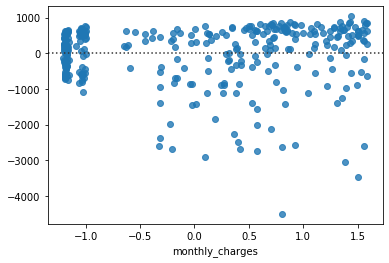

In [78]:
plot_residuals(x_test.monthly_charges, y_test)

### Write a function, plot_regression(x, y) that takes a feature and a target and returns the datapoints, the regression line, and the confidence interval.

In [80]:
def plot_regression(x, y):
    sns.relplot(x,y)
    pass

In [82]:
plot_regression(x_test.monthly_charges, y_test)

ValueError: could not broadcast input array from shape (337) into shape (1)